# Optics: Gaussian beam

In [1]:
import numpy as np
import scipy as sp
import pylab as pl

%matplotlib inline

## Gaussian beam profile: Electric field

\begin{equation}
\mathbf{E}(r, z) = E_0 \hat{\mathbf{x}} \dfrac{w_0}{w(z)} \exp{\left( -\dfrac{r^2}{w(z)^2} \right)} \exp{\left( -i \left( k z+ k \dfrac{r^2}{2R(z)} - \psi(z) \right) \right)}
\end{equation}

| <div style="width:200px">where</div>          | <div style="width:300px">is</div>  |
|--------------------------------------------------|----|
| $r$ | radial distance from the center axis of the beam |
| $z$ | axial distance from the beam's focus (or "waist")|
| $i$ | $\sqrt{-1}$ |
| $k = 2\pi n/\lambda$ |  wave number (in radians per meter) for a free-space wavelength $\lambda$, and $n$ is the index of refraction of the medium in which the beam propagates |
| $E_0 = E(0, 0)$ | the electric field amplitude (and phase) at the origin at time 0 |
| $w(z) = w_0 \sqrt{1+\left( \dfrac{z}{z_R} \right)^2}$ |  is the radius at which the field amplitudes fall to $1/e$ of their axial values at the plane $z$ along the beam |
| $w_0 = w(0)$ |  the waist radius |
| $R(z) = z\left[ 1+ \left(\dfrac{z_R}{z}\right)^2 \right]$ |  is the radius of curvature of the beam's wavefronts at $z$ |
| $\psi(z) = \arctan{\dfrac{z}{z_R}}$ |  is the Gouy phase at $z$, an extra phase term beyond that attributable to the phase velocity of light |
| $z_R = \dfrac{\pi w_0^2 n}{\lambda}$ | Rayleigh range |




We will define the ```Gaussian``` class for the electric field. We are ignoring the polarization vector for simplicity.

In [49]:
class Gaussian:
    def __init__(self, E0, w0, lam, n ):
        #assert len(pol)==3, "Polarization should be a 3d vector"
        self.zR = np.pi*w0**2*n/lam
        self.k = 2*np.pi*n/lam
        self.E0 = E0
        self.w0 = w0
        self.n = n
        #self.pol = pol
        self.divergence = lam/(np.pi*n*w0)
        
        
    def psi(self, z):
        return np.arctan(z/self.zR)
    
    def R(self, z):
        
        return z*(1+(self.zR/z)**2)
        
    def w(self, z):
        return self.w0*np.sqrt(1+(z/self.zR)**2)
    
    def E(self, r, z):
        ans = self.E0 #*self.pol
        ans = ans*(self.w0/self.w(z))
        ans = ans*np.exp(-(r*r/(self.w(z)**2)))
        ans = ans*np.exp(-1j*(self.k*z + self.k*(r**2/(2*self.R(z)) ) -self.psi(z)  ))
        
        return ans

Let us consider two Gaussian beams. The waist radius of one is half of the other. The other parameters are the same. We will compare the divergence of the beams. 

*Note:* The other parameters are just arbitrarily chosen numerical values. 

In [60]:
E0, w0, lam, n = 1,.2,0.1,1
g1 = Gaussian(E0, w0, lam, n)

rmin, rmax = -1, 1
Nr = 100
dr = (rmax-rmin)/Nr
r = np.arange(rmin, rmax+dr, dr)

zmin, zmax = 1e-10, 5
Nz = 100
dz = (zmax-zmin)/Nz
z = np.arange(zmin, zmax+dz, dz)

ZZ, RR = np.meshgrid(z,r)

Ef1 = np.zeros([Nr+1, Nz+1], dtype='complex128')
for i in range(Nz+1):
    for j in range(Nr+1):
        Ef1[i][j] = g1.E(r[i],z[j])
print("div ", g1.divergence)


div  0.15915494309189535


In [61]:
E0, w0, lam, n = 1,.1,0.1,1
g2 = Gaussian(E0, w0, lam, n)

rmin, rmax = -1, 1
dr = (rmax-rmin)/Nr
r = np.arange(rmin, rmax+dr, dr)

zmin, zmax = 1e-10, 2
dz = (zmax-zmin)/Nz
z = np.arange(zmin, zmax+dz, dz)

ZZ, RR = np.meshgrid(z,r)

Ef2 = np.zeros([Nr+1, Nz+1], dtype='complex128')
for i in range(Nz+1):
    for j in range(Nr+1):
        Ef2[i][j] = g2.E(r[i],z[j])
        
print("div ", g2.divergence)

div  0.3183098861837907


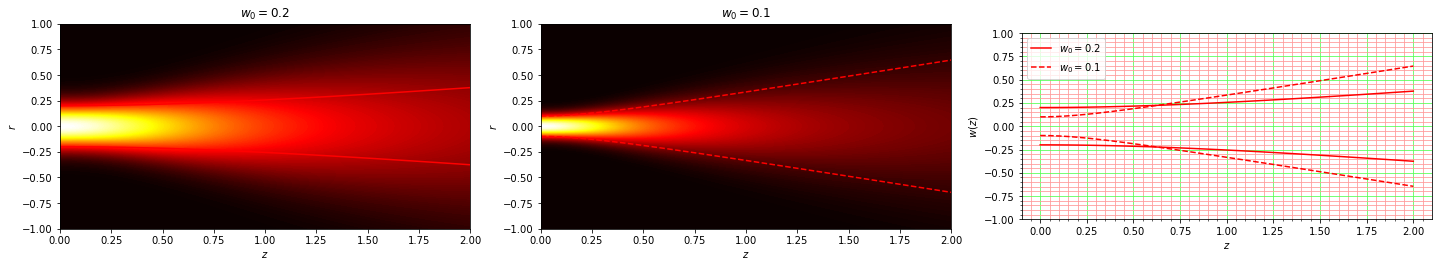

In [127]:
l = [0.5/np.e**2]
pl.figure(1, figsize=(20,5))
a1 = pl.subplot(131)
pl.contourf(ZZ, RR, np.abs(Ef1), levels = 200, cmap='hot')
pl.plot(z, g1.w(z), 'r')
pl.plot(z, -g1.w(z), 'r')
pl.xlabel("$z$")
pl.ylabel("$r$")
a1.set_aspect(0.5)
pl.title("$w_0 = "+str(g1.w0)+"$")
a2 = pl.subplot(132)
pl.contourf(ZZ, RR, np.abs(Ef2), levels = 200, cmap='hot')
pl.plot(z, g2.w(z), 'r--')
pl.plot(z, -g2.w(z), 'r--')
pl.xlabel("$z$")
pl.ylabel("$r$")
pl.title("$w_0 = "+str(g2.w0)+"$")
a2.set_aspect(0.5)
a3 = pl.subplot(133)
l1 = pl.plot(z, g1.w(z),'r', z, -g1.w(z),'r')
l2 = pl.plot(z, g2.w(z),'r--', z, -g2.w(z),'r--')
pl.ylim([min(r), max(r)])
pl.legend((l1[0], l2[0]),("$w_0 = $"+str(g1.w0),"$w_0 = $"+str(g2.w0)))
pl.minorticks_on()
pl.grid(b=True, which='major', color='#55ff55')
pl.grid(b=True, which='minor', color='#ff9999')
pl.xlabel("$z$")
pl.ylabel("$w(z)$")
a3.set_aspect(0.5)


pl.tight_layout()

In [27]:
ZZ.shape, Ef2.shape

((101, 101), (101, 101))